# First Assignement

* Timo Blattner
* 19-115-351
* [https://github.com/TimoBl/DIA_assignements](https://github.com/TimoBl/DIA_assignements)

We first load our image (from NASA daily pictures)

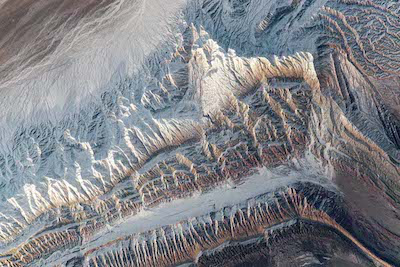

In [1]:
from PIL import Image
import numpy as np
import math

img = Image.open("iss066e149154_lrg.jpeg")
img

And transform it to a numpy which we can use for manipulation

In [2]:
img = np.array(img)
(h, w, c) = img.shape

we choose our target height H and width W as well as specifying that we use 3 channels in this case (red, green, blue)

In [3]:
H, W, C = 400, 600, 3 

the ratio rw, rh will serve as conversion between both image spaces

In [4]:
rw = w / W
rh = h / H

## Nearest neighboor

The first algorithm we choose is the nearest neighboor algorithm which works by choosing for each pixel in the new image space the closest pixel in the original image space

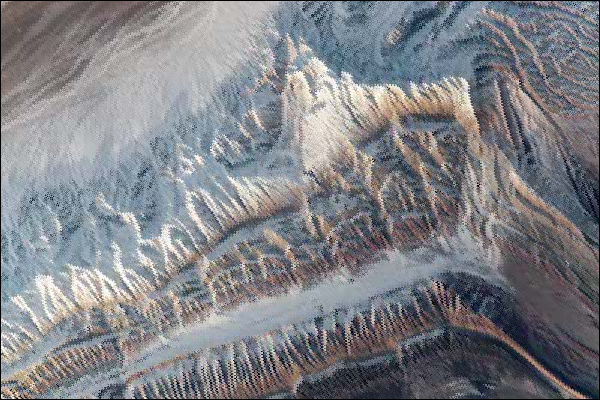

In [5]:
new_img = np.zeros((H, W, C))

for y in range(1, H-1):
    for x in range(1, W-1):
        
        # conversion from new image space to old image space
        nx, ny = x * rw, y * rh
        
        # lower and upper corner in x
        x1, x2 = math.floor(nx), math.ceil(nx+0.00001) 
        y1, y2 = math.floor(ny), math.ceil(ny+0.00001) 
        
        # select closest corner
        i = np.argmax([abs(nx - x1), abs(nx - x2)])
        j = np.argmax([abs(ny - y1), abs(ny - y2)])
        
        # and add it to image
        new_img[y, x, :] = img[y1 + i, x1 + j, :]
        
new_img2 = Image.fromarray(np.asarray(new_img, dtype=np.uint8), 'RGB')
new_img2

We see this upscaling algorithm generates a lot of artifacts that we would like to avoid, just by the fact that it choses the max

## Bilinear Upsampling

Happily there is an algorithm which does a way better job at upsampling, namely bilinear upsampling. It works by multiplying the value of the corner with the volume between the point and the corner, so it generates a way smoother image. I used the formulas from [Wikipedia](https://en.wikipedia.org/wiki/Bilinear_interpolation) to help myself.

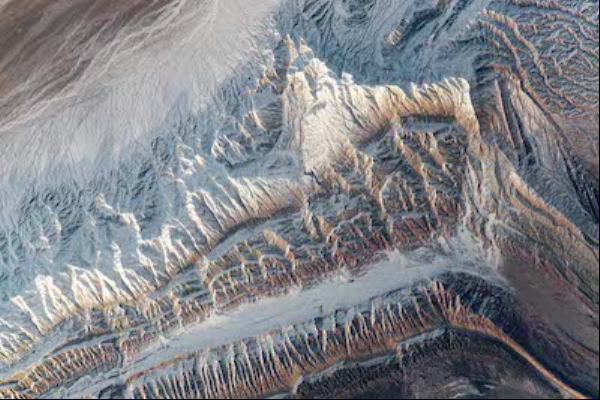

In [6]:
new_img = np.zeros((H, W, C))

for y in range(0, H-1):
    for x in range(0, W-1):
        
        nx, ny = x * rw, y * rh
        
        x1, x2 = math.floor(nx), min(math.ceil(nx+0.0001), W-1)
        y1, y2 = math.floor(ny), min(math.ceil(ny+0.0001), H-1)

        a = img[y1, x1, :] * (x2 - nx) * (y2 - ny)
        b = img[y1, x2, :] * (nx - x1) * (y2 - ny)
        c = img[y2, x1, :] * (x2 - nx) * (ny - y1)
        d = img[y2, x2, :] * (nx - x1) * (ny - y1)
        
        if (x1 != x2 and y1 != y2):
            new_img[y, x, :] = (a + b + c + d) / ((x2 - x1) * (y2 - y1))
            
new_img2 = Image.fromarray(np.asarray(new_img, dtype=np.uint8), 'RGB')
new_img2